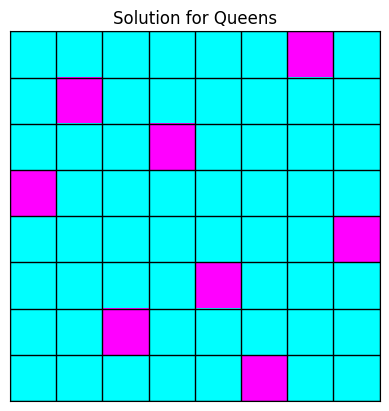

Solution found: [7, 2, 4, 1, 8, 5, 3, 6]


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np


def initialization(population_size, n_queens):
    population = []
    for _ in range(population_size):
        chromosome = [random.randint(1, n_queens) for _ in range(n_queens)]
        population.append(chromosome)
    return population

def selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [score / total_fitness for score in fitness_scores]
    selected_indices = random.choices(range(len(population)), weights=probabilities, k=len(population))
    return [population[i] for i in selected_indices]

def fitness_function(chromo):
    attacks = 0
    for i in range(len(chromo)):
        for j in range(i+1, len(chromo)):
            if chromo[i] == chromo[j] or abs(chromo[i] - chromo[j]) == j - i:
                attacks += 1
    return len(chromo) * (len(chromo) - 1) // 2 - attacks


def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(chromo, mutation):
    if random.random() < mutation:
        index = random.randint(0, len(chromo) - 1)
        chromo[index] = random.randint(1, len(chromo))
    return chromo

def plot_board(chromo):
    n_queens = len(chromo)
    board = np.zeros((n_queens, n_queens))
    for i in range(n_queens):
        board[i][chromo[i] - 1] = 1

    plt.imshow(board, cmap='cool')

    for i in range(n_queens + 1):
        plt.axhline(i - 0.5, color='black', lw=1)
        plt.axvline(i - 0.5, color='black', lw=1)

    plt.title('Solution for Queens')
    plt.xticks([])
    plt.yticks([])
    plt.show()

def genetic_algorithm(queens, population_size, generations, mutation_rate):
    population = initialization(population_size, n_queens)
    for _ in range(generations):
        fitness_scores = [fitness_function(chromosome) for chromosome in population]

        if max(fitness_scores) == n_queens * (n_queens - 1) // 2:
            solution = population[fitness_scores.index(max(fitness_scores))]
            plot_board(solution)
            return solution

        selected_population = selection(population, fitness_scores)
        new_population = []

        for _ in range(population_size // 2):
            parent1, parent2 = random.sample(selected_population, 2)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutation(child1, mutation_rate)
            child2 = mutation(child2, mutation_rate)
            new_population.extend([child1, child2])

        population = new_population

    best_solution = max(population, key=fitness_function)
    plot_board(best_solution)
    return best_solution

n_queens = 8
population_size = 100
generations = 1000
mutation_rate = 0.05

solution = genetic_algorithm(n_queens, population_size, generations, mutation_rate)
print(f"Solution found: {solution}")